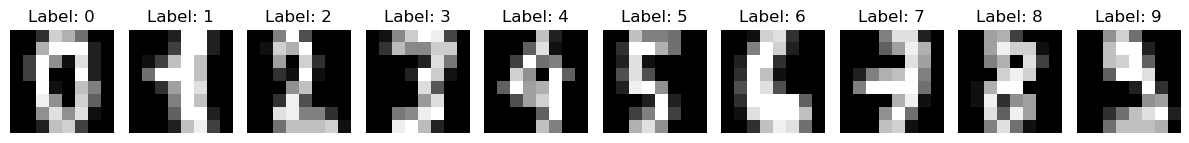

Training samples: 1078, Test samples: 719
Test set accuracy: 96.52%


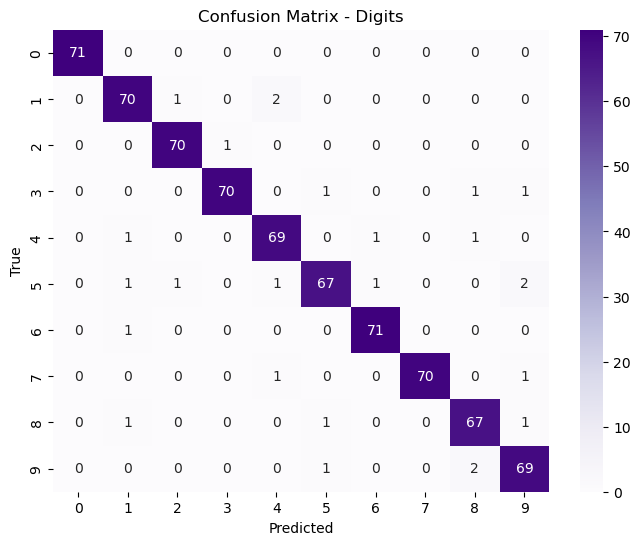

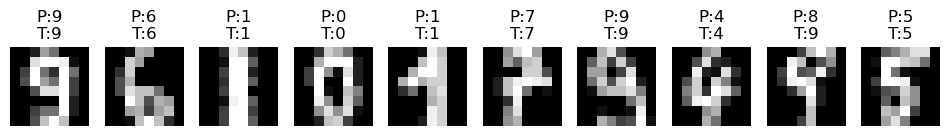

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape, y.shape  # (1797, 64), (1797,)

# Show first 10 images
fig, axes = plt.subplots(1, 10, figsize=(12, 2))
for i, ax in enumerate(axes):
    ax.imshow(X[i + 20].reshape(8, 8), cmap='gray')  # Shift to different samples
    ax.set_title(f"Label: {y[i + 20]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Change the random state here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=7, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# Train the model
reg = linear_model.LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2%}")

# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Digits")
plt.show()

# Set seed to change output

indices = np.random.choice(len(X_test), 10, replace=False)
fig, axis = plt.subplots(1,10,figsize = (12,2))
for i, idx in enumerate(indices):
    ax = axis[i]
    ax.imshow(X_test[idx].reshape(8,8),cmap="grey")
    ax.set_title(f"P:{y_pred[idx]}\nT:{y_test[idx]}")
    ax.axis('off')
plt.show()
